## EDA

In [ ]:
import pandas as pd
from taxipred.utils.constants import DATA_PATH
import matplotlib.pyplot as plt

df = pd.read_csv(DATA_PATH / "taxi_trip_pricing.csv")
df.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [57]:
df.shape

(1000, 11)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [59]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [60]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

#### Drop nan values in Trip Price becuase that's where we want to predict

In [73]:
df = df.dropna(subset=["Trip_Price"])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       901 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        903 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              907 non-null    float64
 7   Per_Km_Rate            907 non-null    float64
 8   Per_Minute_Rate        902 non-null    float64
 9   Trip_Duration_Minutes  905 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 121.4+ KB


### Removing the columns that I won't use in the prediction

In [ ]:
df = df.drop["Passenger_count"], df[" "]

### looking in to trip distance km

In [ ]:

df["Trip_Distance_km"].unique()

array([ 19.35      ,  36.87      ,  30.33      ,          nan,
         8.64      ,   3.85      ,  43.44      ,  35.7       ,
        41.79      ,  11.4       ,   9.91      ,   9.99      ,
        15.91      ,  26.71      ,  22.17      ,  15.27      ,
        30.98      ,   7.84      , 105.94355004,  18.95      ,
        23.35      ,  39.47      ,  10.78      , 138.09832791,
        30.03      ,   3.28      ,  30.77      ,   9.36      ,
        47.5       ,  48.32      ,  40.61      ,  15.93      ,
         5.79      ,  34.53      ,  22.57      ,   6.98      ,
        25.26      ,   2.69      ,  45.56      ,  13.68      ,
        33.46      ,  16.27      ,  26.48      ,  27.79      ,
        10.06      ,  48.51      ,  38.98      ,  47.04      ,
        44.85      ,  30.3       ,  46.17      ,   5.34      ,
        10.6       ,   3.22      ,  16.94      ,  20.05      ,
        14.3       ,  41.61      ,  18.48      , 146.06704716,
        27.59      ,   7.91      ,  40.31      ,   4.65

In [76]:
df["Trip_Distance_km"].nlargest(10)

64     146.067047
302    145.747060
532    139.476515
268    139.062230
616    138.763887
27     138.098328
225    130.809001
835    126.547628
588    122.820191
338    116.667681
Name: Trip_Distance_km, dtype: float64

In [77]:
df["Trip_Distance_km"].min()

np.float64(1.23)

In [78]:
df["Trip_Distance_km"].isna().sum()

np.int64(50)

### Checking corelation between distance and price

Text(0, 0.5, 'Trip_Price')

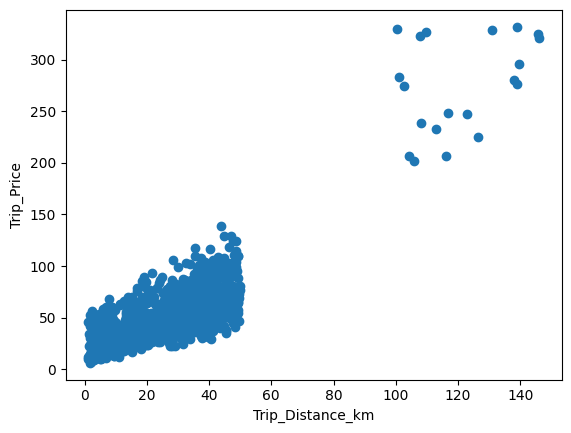

In [83]:
plt.scatter(df["Trip_Distance_km"], df["Trip_Price"])
plt.xlabel("Trip_Distance_km")
plt.ylabel("Trip_Price")


### checking 